# **Ensemble Learning and Random Forests**

Ensemble learning is the machine learning application of wisdom of crowd, we train several predictors known as ensemble.

A commonly used method is random forest, where we train several decision tree classifier on different subsets of the training data, when we get a new instance we take the prediction from each tree and predict the class with most votes.

## **Voting Classifier**

Hard voting classifier(train 4 different classifier models on the same dataset, to create an even better classifier aggregrate the predictions of each classifier: the class with the most votes is ensemble's prediction)

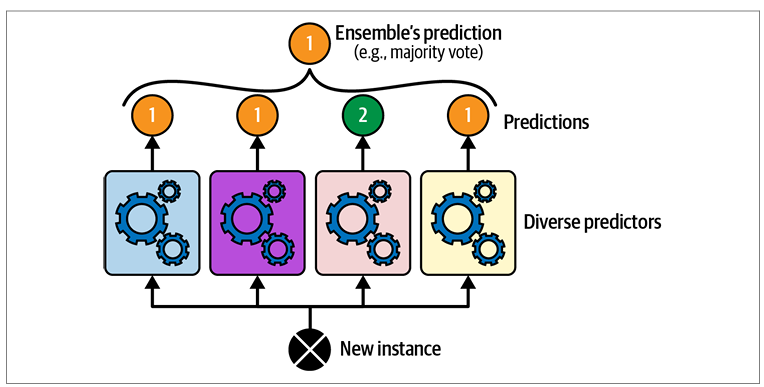

suprisingly, it works well and gives better accuracy than the best performing model, and is a stronger learner(achieving high accuracy) even if each classifier is a weak learner(meaning it does slightly better than a random classifier)

!! Ensemble methods work best when predictors are as independent from one other as possible. One way is to train classifiers using very different algorithms

In [18]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('lr',LogisticRegression(random_state=42)),
    ('rf',RandomForestClassifier(random_state=42)),
    ('svc',SVC(random_state=42))
])
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

the voting classifier clones every estimator and fits them, the original estimators can alo be seen

In [19]:
for name, clf in voting_clf.named_estimators_.items():
    print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


named_estimators_ returns a list, while fitted clones are available through estimators_

when we use the predict() method it performs hard voting, let's see with an example

In [20]:
print(voting_clf.predict(X_test))
for clf in voting_clf.estimators_:
    print(clf.predict(X_test))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0]
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0

In [21]:
print(voting_clf.score(X_test,y_test))

0.912


Soft voting, instead of classifying an instance on the basis of majority votes, we average the probability of each class averaged overa all individual classifier(i.e. if they all have a predict_proba() method) and predict the one with highest probability

In [22]:
voting_clf.voting ="soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train,y_train)
print(voting_clf.score(X_test,y_test))

0.92


## **Bagging and Pasting**

One way to get a diverse set of classifiers is to train different algorithms as seen in voting. Another approach is train the same algorithm but on different random subsets of the training data.

Bagging, when sampling is performed with replacement,meaning that a particular instance can be selected multiple times for the same base model (predictor)

Pasting, when sampling is performed without replacement. This means that each training instance can only appear once in each base model's training set.

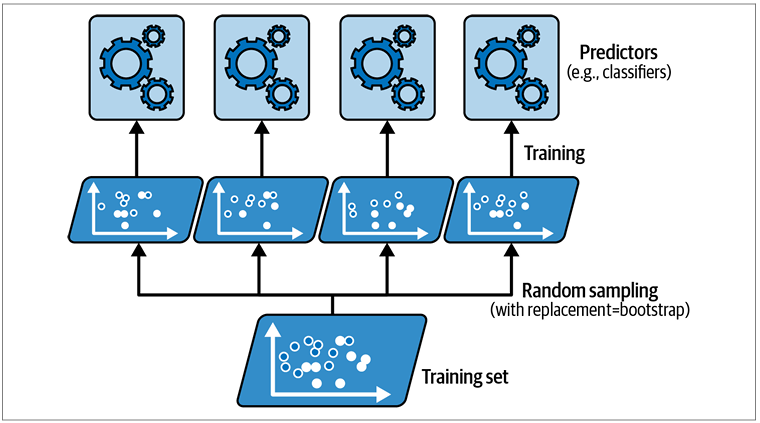

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregrating the predictions of all predictors. The aggregration is statistical mode(i.e. hard voting) or average for regression. 

Each model has a higher bias than if it were trained on original dataset, but aggregration reduces both bias and variance.

The net result has a similar bias but lower variance, than a single predictor trained on original set.

Models can be trained parallely, which makes them a popular method: they scale very well.

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=1,random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=1, random_state=42)

n_jobs=-1, allows parallel execution

A BaggingClassifier automatically performs soft-voting if the classifier used has the method predict_proba()

Bagging is generally prefered as it introduces more diversity by allowing replacement, which increases the bias slightly but the extra diversity means the models end up being less correlated.

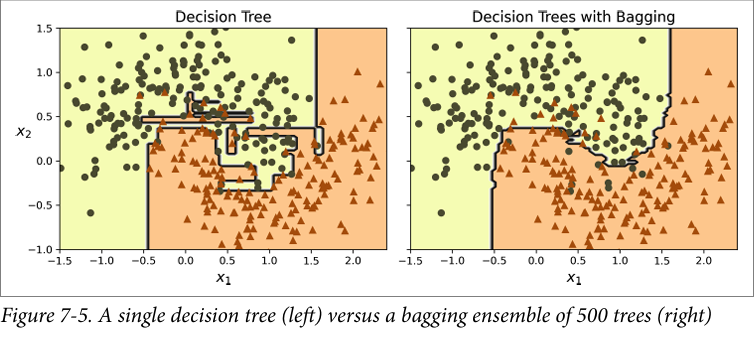

As we see the ensemble generalizes well, it has comparable bias but smaller variance

To perform pasting method using sklearn simply set bootstrap=False for the bagging methods

### **Out-of-Bag Evaluation**

Out of the m instances only 63% are sampled when using Bagging leaving around 37% unused(out-of-bag instances), so we can set oob_score=True wen creating a baggin classifier to request an OOB evaluation after training

In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=100,n_jobs=-1,oob_score=True,random_state=42)
bag_clf.fit(X_train,y_train)
print(bag_clf.oob_score_)

0.928


In [27]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.92


oob also has the oob_decision_function_ attribute if the classifier method has predit_proba() method, the decision fucntion returns the probability of each training instance

In scikit-learn, the BaggingClassifier supports Random Patches and Random Subspaces for feature sampling, which are useful in high-dimensional datasets like images.

1. Random Patches:
   - Both instances and features are sampled.
   - Uses bootstrap=True (for instance sampling) and bootstrap_features=True (for feature sampling).
   - This method helps increase diversity among the base learners by training each model on different subsets of both data and features.
   - Use Case: When you have high-dimensional data and want both diversity and speed in training.

2. Random Subspaces:
   - Only features are sampled, while all training instances are used.
   - Uses bootstrap=False (no instance sampling) and bootstrap_features=True (feature sampling).
   - Focuses on creating diversity by varying the features each model sees, while keeping the same set of training instances.
   - Use Case: When you have many features but fewer instances, and want to reduce overfitting.

Key Parameters in BaggingClassifier :
- max_samples: The proportion of instances used for each base model.
- max_features: The proportion of features used for each base model.
- bootstrap: Whether to sample instances with replacement.
- bootstrap_features: Whether to sample features with replacement.

These techniques help create more diverse base models, which can improve generalization, especially in high-dimensional spaces, and speed up training.

## **Random Forest**
Random Forest is an ensemble of decision trees, generally trained via the bagging method(or sometimes pasting), typically set with max_samples = size of training set. But instead of using the BaggingClassifer and passing it DecisionTreeClassifier a better option is to directly use the RandomForestClassifier(there is also RandomForestRegressor)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

The above code trains 500 trees with max leaf nodes 16

RandomForestClassifier contains almost hyperparameters of BaggingClassifier + DecisionTreeClassifier

Random Forest, each decision tree is trained using a random subset of features at each node instead of using all features(by default it is square root of n), which introduces extra randomness. This increases the diversity of the trees in the forest, reducing the correlation between them. While this may slightly increase the bias of individual trees (because they search fewer features), it lowers the variance of the overall model. The result is a more robust model that generalizes better and is less prone to overfitting compared to a single decision tree. This tradeoff generally leads to better performance overall.

so to implement it using bagginclassfier

In [29]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16),n_estimators=500,n_jobs=-1,random_state=42)

>Extra trees: we saw above how randomforestclassifier selects features randomly from entire feature set then selects the best thresholds of the feature to split, to make it even more random we can split the nodes using random thresholds as well. This will increase the bias even more for a lower variance. It can be done by setting splitter="random" for RandomForestClassifier() or use ExtraTreesClassifier() which has bootstrap=False by default. There is similarly ExtraTreesRegressor() also

>Feature importance: after training a random forest classifier we can access the importance of features by using feature_importances_ variable to get the relative importance of features in increasing the purity of the nodes. Random Forests come to be handy to search withc features are important

## **Boosting**

The general idea of most boosting methods is to train predictors sequentially, each trying to correct it's predecessor.

### **AdaBoost**

Adaboost trains a new predictor by paying attention to training instances its predecessor classifyed wrongly. This results in the new predictor focusing more and more on hard cases. It gives more weightage to the miscallsifed instances.

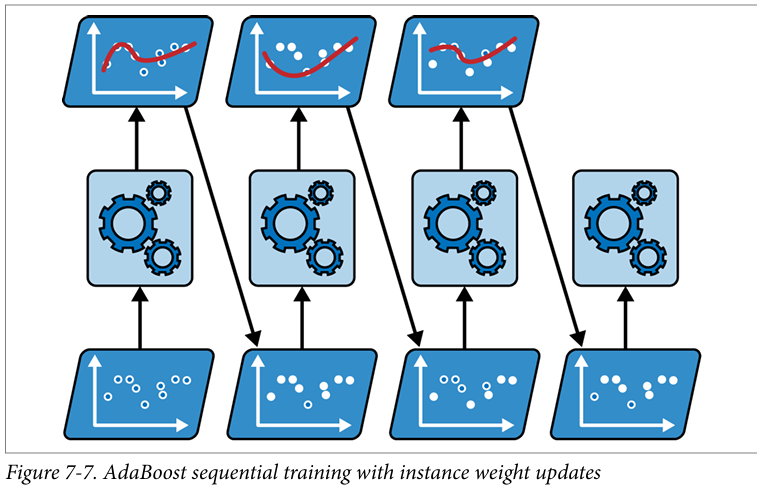

After training, the ensemble predictions are very much similar to baggin or pasting, except the predictors have different weigths depending on their overall accuracy on the weighted training set.

!! It cannot be trained parallely as it must weight for the mistakes of its predecessors

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30,learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)

c:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

If the Adaboost model is overfitting reduce the number of estimators or increase regularization of the base model

### Working of AdaBoost Algorithm:

1. **Initialize Weights**: 
   - Assign equal weights to all training instances (e.g., 1/n, where n is the total number of instances).

2. **Train Weak Classifier**: 
   - Train a weak classifier (e.g., decision stump) using the weighted training data.

3. **Calculate Error Rate**: 
   - Calculate the weighted error rate of the classifier, which is the sum of the weights of the misclassified instances.

4. **Calculate Classifier Weight**: 
   - Compute the weight of the classifier based on its error rate. More accurate classifiers have higher weights:
     \[
     \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
     \]

5. **Update Weights of Misclassified Instances**: 
   - Increase the weights of misclassified instances so they get more focus in the next iteration.
   - Decrease the weights of correctly classified instances.

6. **Normalize Weights**: 
   - Normalize the weights so that they sum up to 1.

7. **Repeat for Multiple Iterations**: 
   - Repeat steps 2-6 for a fixed number of iterations or until a stopping condition is met.

8. **Final Prediction**: 
   - Combine the predictions of all weak classifiers using a weighted majority vote (for classification) or weighted sum (for regression):
     \[
     H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)
     \]
     where \(h_t(x)\) is the prediction of the classifier in iteration \(t\) and \(\alpha_t\) is its weight.

9. **Result**: 
   - The final output is a strong classifier that combines the knowledge of all weak classifiers, with more accurate classifiers contributing more to the final decision.


## **Gradient Boosting**

Gradient Boosting, instead of tweaking weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by previous predictor.

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)
X_new = np.array([[-0.4], [0.], [0.5]])
print(sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)))

[0.47994544 0.02825231 0.60545298]


The above three are the prediction using the GBRT we trained we could also just use the scikit-learns GBRT

In [35]:
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3,random_state=42,learning_rate=1.0)
gbrt.fit(X,y)
print(gbrt.predict(X_new))

[0.47994544 0.02825231 0.60545298]



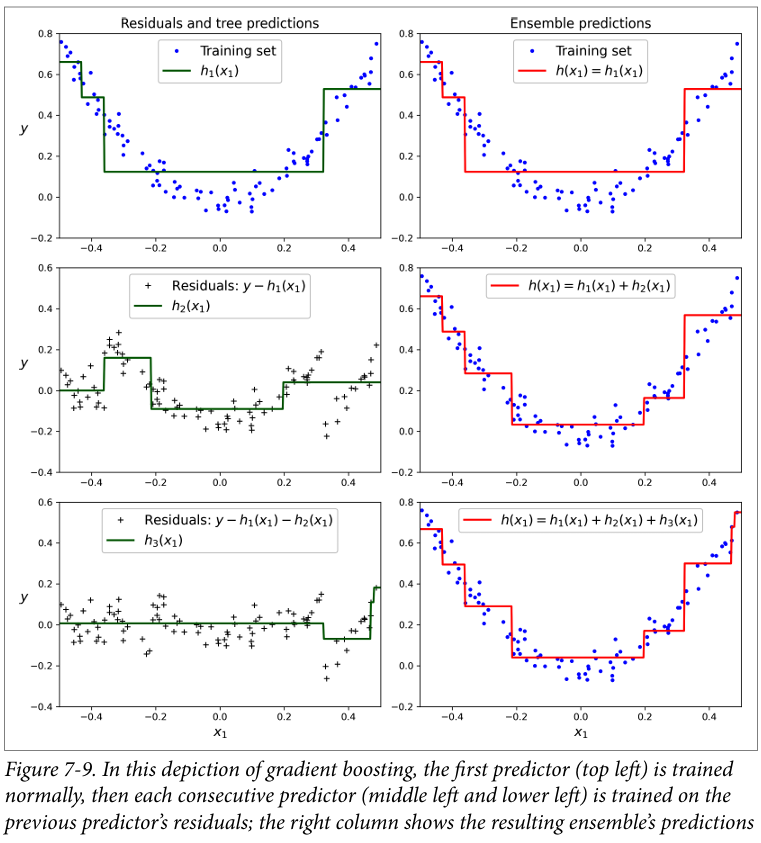

In Gradient Boosting (GBRT), the learning rate controls the contribution of each newly added tree (or model) in the boosting process. Smaller it is more trees we will require to fit the training data, but it will genralize better. This is a regulariztion technique called shrinkage.

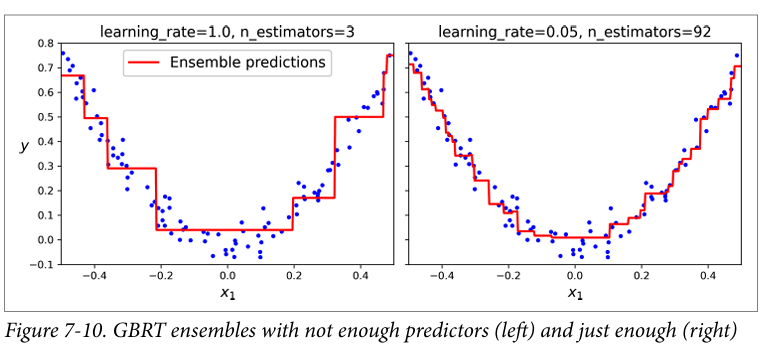

In AdaBoost, the learning rate determines how much each weak classifier contributes to the final prediction. It scales the weight of each weak classifier.

to select optimal number of trees, cross-validation can be used or better to use n_iter_no_change hypermparameter, it will stop adding more trees if the last n trees didn't help. It splits the dataset into training and validation set testing model's performance at each iteration. The size of validation set is controlled by validation_fraction hyperparameter(by default 10%). So set n_estimators to a large value and n_iter_no_change you need to play around

hyperparameter subsample to decide fraction of training instances to use is also there



## **Histogram-Based Gradient Boosting**

Histogram-Based Gradient Boosting (HGB) is an optimized version of traditional Gradient Boosting for large datasets. It works by binning input features, replacing them with integer values, which reduces the number of possible thresholds the algorithm needs to evaluate. This optimization improves computational efficiency and memory usage.

Key points about HGB:

- Binning: Features are binned into discrete values, controlled by the max_bins hyperparameter (default is 255). This binning reduces the need to sort features during training, speeding up the process.
  
- Complexity: HGB has a lower computational complexity of O(b × m) compared to regular GBRT, which has O(n × m × log(m)), where b is the number of bins, m is the number of instances, and n is the number of features. This results in significantly faster training on large datasets.
  
- Precision Loss: Binning leads to some loss of precision, which can act as a regularizer, potentially reducing overfitting but may also cause underfitting depending on the dataset.

- Differences from Regular GBRT:
  - Early Stopping: Automatically enabled when there are more than 10,000 instances. This can be controlled via the early_stopping hyperparameter.
  - Subsampling: Not supported.
  - Hyperparameters: The only tree-specific hyperparameters that can be adjusted are max_leaf_nodes, min_samples_leaf, and max_depth.
  
- Support for Categorical Features and Missing Values: HGB can handle categorical features and missing values directly, simplifying preprocessing. Categorical features should be encoded as integers within the range defined by max_bins (using an OrdinalEncoder).

HGB Classes in Scikit-Learn:
- HistGradientBoostingRegressor
- HistGradientBoostingClassifier

These classes are similar to their regular GBRT counterparts but with optimizations for larger datasets and fewer configurable parameters.


## **Stacking**

Instead of using aggregration of all predictors in an ensemble, why doen't we train a model to do the aggregration for us.

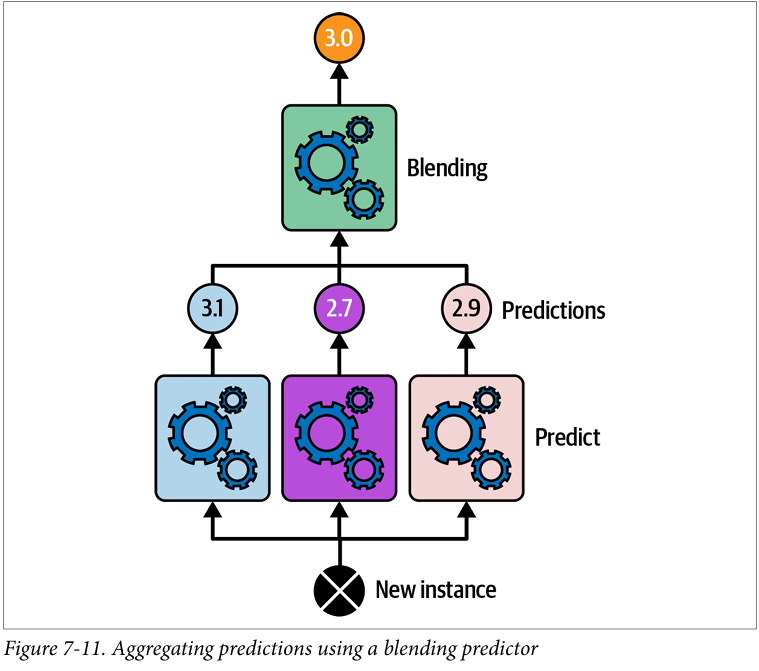

To train the blender we need to build a blending training set(use cross_val_predict() on every predictor in the ensemble to get out-of-sample predictions for each instance in the original set, and use these as the input features, output features can simply be copied from the original training set). The input features will be one per predictor and only one output feature.

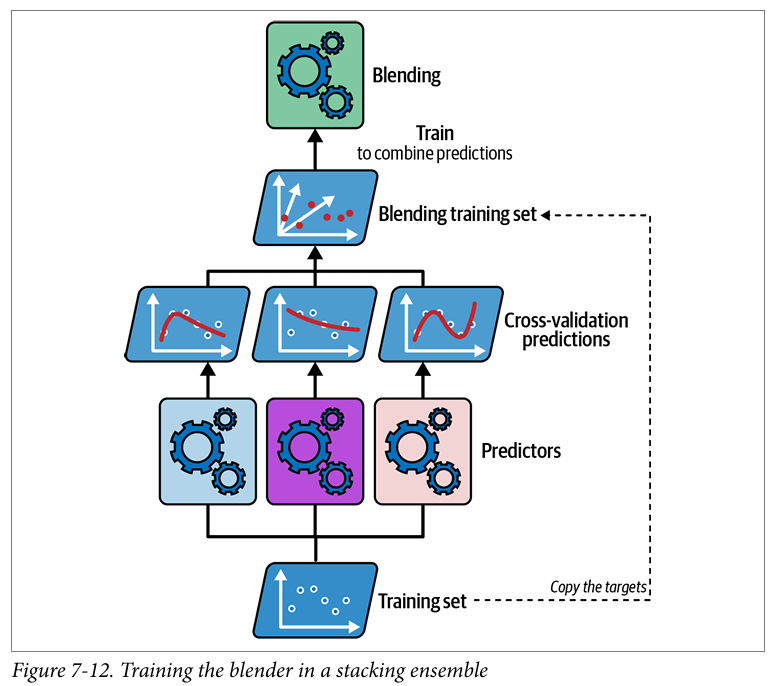

One could even train multiple blenders and train a blender on top of it, with this it is possible to squeeze a few more percentage of accuracy but at what cost? Computational cost and complexity

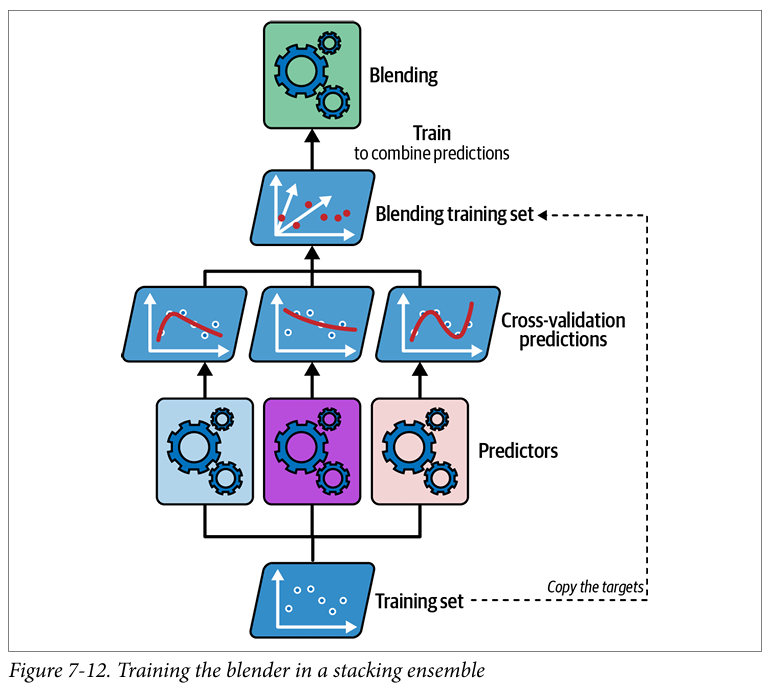

Scikit-learn provieds us with two classes for stacking ensemble: StackingClassifier and StackingRegressor

In [40]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(probability=True,random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)
X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
stacking_clf.fit(X_train,y_train)
y_pred = stacking_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
for name, clf in stacking_clf.named_estimators_.items():
    print(name,"=",clf.score(X_test,y_test))

0.912
lr = 0.864
rf = 0.896
svc = 0.896


Stacking classifier will call predict_proba() if available otherwise decision_function() or as last resort predict().

If the final estimator is not provided StackingClassifier will use Logistic Regression and StackingRegressor will use RidgeCV

## **Exercise**

1) If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?

    Ensemble methods benefit from model diversity. If the models make different mistakes, combining their outputs can lead to a better overall result. You wouldn't necessarily achieve a drastic improvement, but you could still see a small increase in performance. It will work especially well if the models are different which will allow the ensemble to overcome the mistakes of different predictors.

2) What is the difference between hard and soft voting classifiers?

    Hard voting choose the statistical mode, Soft voting choose the class with highest weighted probability

3) Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles?

    Bagging, pasting and random forest ensembles can be distributed across multiple servers but boosting and stacking ensembles require sequential training

4) What is the benefit of out-of-bag evaluation?

    Benifit of out-of-bag evaluation is that we don't need another validation dataset and can use the entire dataset

    The benefit of OOB evaluation is that it provides an unbiased estimate of model performance without needing an additional validation set, making it more efficient. The OOB data serves as a form of cross-validation during the training process.

5) What makes extra-trees ensembles more random than regular random forests? How can this extra randomness help? Are extra-trees classifiers slower or faster than regular random forests?

    Extra-trees after selecting a random subset of features instead of finding best thresholds choose random thresholds which increase the diversity. They are faster than regular random forests as they don't search for the best thresholds

6) If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak, and how?

    If your AdaBoost ensemble underfits the training data, you can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimator. You may also try slightly increasing the learning rate.

7) If your gradient boosting ensemble overfits the training set, should you increase or decrease the learning rate?

    If your Gradient Boosting ensemble overfits the training set, you should try decreasing the learning rate. You could also use early stopping to find the right number of predictors (you probably have too many).

8) Load the MNIST dataset (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for      validation, and 10,000 for testing). Then train various classifiers, such as a random forest classifier, an extra-trees classifier, and an SVM classifier. Next, try
 to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try
 it on the test set. How much better does it perform compared to the individual classifiers?

9) Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions:
 each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier
 on this new training set. Congratulations—you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the
 ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier? Now try again using a StackingClassifier instead. Do you get better performance? If
 so, why?